In [1]:
import sys
sys.path.append('../AGDS/')
%load_ext autoreload
%autoreload 2

## AGDS Implementation


## Associative transformation

First we need to create a proper represenation of the input data as the associative graph. In my case as an input I will use pandas `DataFrame` as input and `pygrahphviz` graph to create the graph. As an example I will use data set from the lectures.

In [2]:
import pandas as pd
from AGDS.AssociativeGraph import AssociativeGraph

data = {'id': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9'],
        'Sepal length': [5.4, 6.3, 6.0, 6.7, 6.0, 5.9, 6.0, 6.7, 6.5],
        'Sepal width': [3.0, 3.3, 2.7, 3.0, 2.2, 3.2, 3.0, 2.5, 3.2],
        'Petal length': [4.5, 4.7, 5.1, 5.0, 5.0, 4.8, 4.8, 5.0, 5.1],
        'Petal width': [1.5, 1.6, 1.6, 1.7, 1.5, 1.8, 1.8, 2.0, 2.0],
        'Class': ['Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', "Viriginica", 'Versicolor', "Viriginica", "Viriginica", "Viriginica"]}
input_table = pd.DataFrame(data)

In [3]:
input_table.head()

,id,Sepal length,Sepal width,Petal length,Petal width,Class
0,O1,5.4,3.0,4.5,1.5,Versicolor
1,O2,6.3,3.3,4.7,1.6,Versicolor
2,O3,6.0,2.7,5.1,1.6,Versicolor
3,O4,6.7,3.0,5.0,1.7,Versicolor
4,O5,6.0,2.2,5.0,1.5,Viriginica


Later in the script I will use object of my own class `AssociativeGraph` which is transforming the dataframe into proper graph on its construction. For now I will present construction process.

In [4]:
graph = AssociativeGraph(input_table)

In [5]:
column_names = [x for x in input_table.columns if x != "id"]
print(column_names)

['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']


First we need to add attributes names and connect them with `param` node.

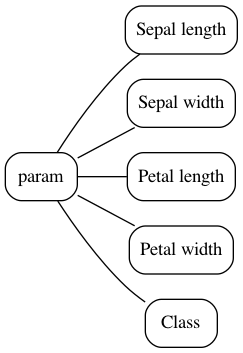

In [6]:
graph.add_node("param")
for column in column_names:
    graph.add_node(column)
    graph.add_edge( "param", column)

graph.render_graph()

Now we need to add all the attributes of every entry into our graph and connect it with its column name and prev and next items. 

As we can have multiple instances of different attributes but with the same value I will create the node `id` by hash(`$attribute_name:$attribute_value`) (e.g `hash("Sepal length:2.2")`). 

In [7]:
def get_hash(attribute_name, attribute_value):
    return hash("{attribute_name}_{attribute_value}".format(attribute_value=attribute_value, attribute_name=attribute_name))

In [8]:
from itertools import islice

def previous_current_next(iterable):
    """
    Make an iterator that yields an (previous, current, next) tuple per element.
    """
    iterable = iter(iterable)
    prv = None
    cur = iterable.__next__()
    try:
        while True:
            nxt = iterable.__next__()
            yield (prv, cur, nxt)
            prv = cur
            cur = nxt
    except StopIteration:
        yield (prv, cur, None)

for column_name in column_names:
    column = list(input_table[column_name])
    column.sort()
    for prev_item, attribute, next_item in previous_current_next(column):
        prev_id = get_hash(column_name, prev_item)
        node_id = get_hash(column_name, attribute)
        next_id = get_hash(column_name, next_item)

        graph.add_node(node_id, label=attribute)
        if not graph.has_edge(column_name, node_id):
            graph.add_edge(column_name, node_id)
        if prev_item and not graph.has_edge(prev_id, node_id) and prev_item != attribute:
            graph.add_edge(prev_id, node_id, constraint=False)
        if next_item and not graph.has_edge(node_id, next_id) and next_item != attribute:
            graph.add_edge(node_id, next_id, constraint=False)

None 5.4 5.9
5.4 5.9 6.0
5.9 6.0 6.0
6.0 6.0 6.0
6.0 6.0 6.3
6.0 6.3 6.5
6.3 6.5 6.7
6.5 6.7 6.7
6.7 6.7 None
None 2.2 2.5
2.2 2.5 2.7
2.5 2.7 3.0
2.7 3.0 3.0
3.0 3.0 3.0
3.0 3.0 3.2
3.0 3.2 3.2
3.2 3.2 3.3
3.2 3.3 None
None 4.5 4.7
4.5 4.7 4.8
4.7 4.8 4.8
4.8 4.8 5.0
4.8 5.0 5.0
5.0 5.0 5.0
5.0 5.0 5.1
5.0 5.1 5.1
5.1 5.1 None
None 1.5 1.5
1.5 1.5 1.6
1.5 1.6 1.6
1.6 1.6 1.7
1.6 1.7 1.8
1.7 1.8 1.8
1.8 1.8 2.0
1.8 2.0 2.0
2.0 2.0 None
None Versicolor Versicolor
Versicolor Versicolor Versicolor
Versicolor Versicolor Versicolor
Versicolor Versicolor Versicolor
Versicolor Versicolor Viriginica
Versicolor Viriginica Viriginica
Viriginica Viriginica Viriginica
Viriginica Viriginica Viriginica
Viriginica Viriginica None


/usr/local/anaconda3/envs/CI/lib/python3.7/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Warning: flat edge between adjacent nodes one of which has a record shape - replace records with HTML-like labels
  Edge 4248082523795217675 -- -2788296498567979771
Error: lost -2788296498567979771 4248082523795217675 edge
Error: lost 4248082523795217675 -5615493845601677208 edge
Error: lost -5615493845601677208 6162382895103915805 edge
Error: lost 6162382895103915805 -5640025418946271969 edge
Error: lost -5640025418946271969 -3806566497092964115 edge
Error: lost -3474917026415606315 -4432438241911934306 edge
Error: lost -4432438241911934306 6823403747797800853 edge
Error: lost 6823403747797800853 -1823667960696927130 edge
Error: lost -1823667960696927130 -3153118146608689419 edge
Error: lost -3153118146608689419 -988609065237253821 edge
Error: lost 3974738909748214721 -2149804090838353083 edge
Error: lost -2149804090838353083 8275381223433779413 edge
Error: lost 8275381223433779413 7293

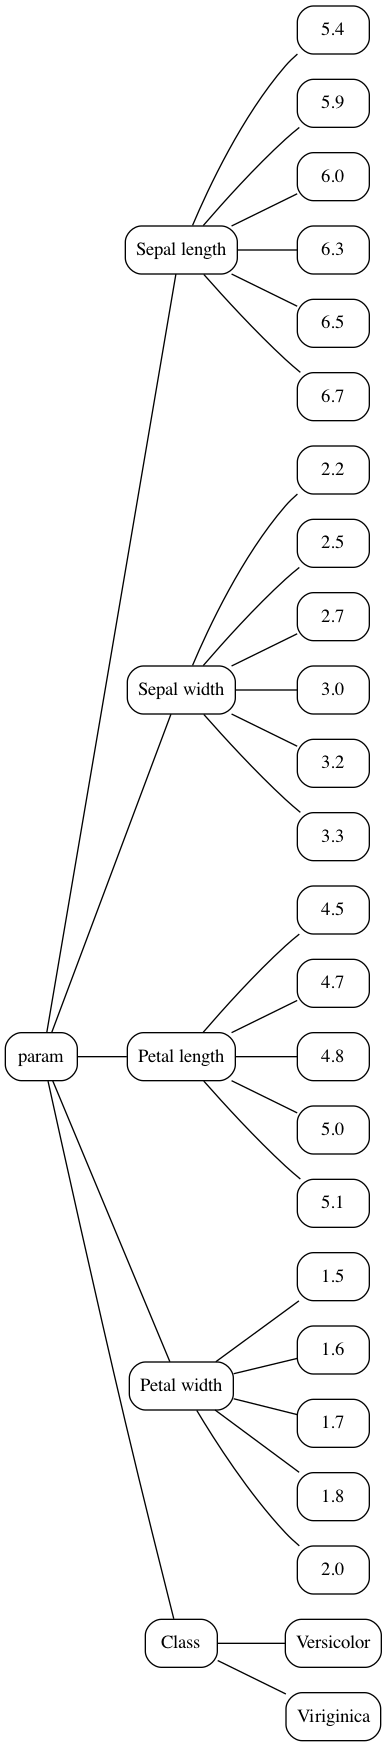

In [9]:
graph.render_graph()

Now let's connect entity id node with its attributes.

In [11]:
rows = input_table.to_dict(orient='records')


In [12]:
for row in rows:
    entity_id = row["id"]
    graph.add_node(entity_id)
    for column_name, attribute in row.items():
        if column_name != "id":
            node_id = get_hash(column_name, attribute)
            graph.add_edge(node_id, entity_id)

/usr/local/anaconda3/envs/CI/lib/python3.7/site-packages/pygraphviz/agraph.py:1341: RuntimeWarning: Warning: flat edge between adjacent nodes one of which has a record shape - replace records with HTML-like labels
  Edge -5393845943974755623 -- 1044405598934693053
Error: lost 1044405598934693053 -5393845943974755623 edge

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


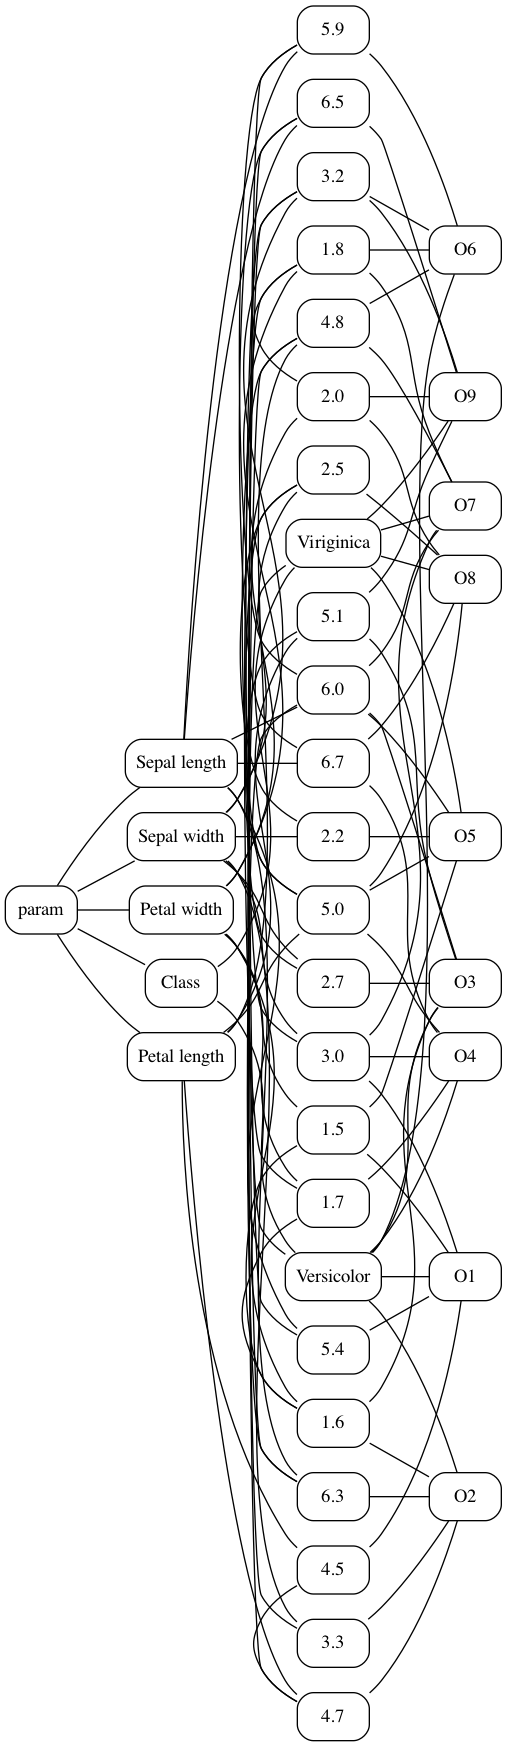

In [13]:
graph.render_graph()